# ch3. seaborn

seaborn은 matplotlib의 기능과 스타일을 확장한 고급 시각화 도구입니다. seaborn을 사용하면 별도의 전처리나 통계 분석 코드를 작성하지 않더라도 데이터의 통계적 특성을 파악하기가 쉽습니다.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("./data/diamonds.csv", index_col=False)
df = df.drop(["Unnamed: 0"], axis=1)

In [77]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## regplot
regplot은 scatter plot에 선형 회귀 선을 같이 그려주는 그래프입니다. 회귀 선이란 두 변수 간의 관계를 가장 잘 설명하는 직선이라고 생각하면 됩니다. 보통 두 변수가 뚜렷한 상관관계가 있다고 강조하고 싶을 때나, 아예 상관관계가 없음을 보여주기 위해서 사용합니다.

In [7]:
sampled_df = df.sample(1000)

<AxesSubplot: xlabel='price', ylabel='carat'>

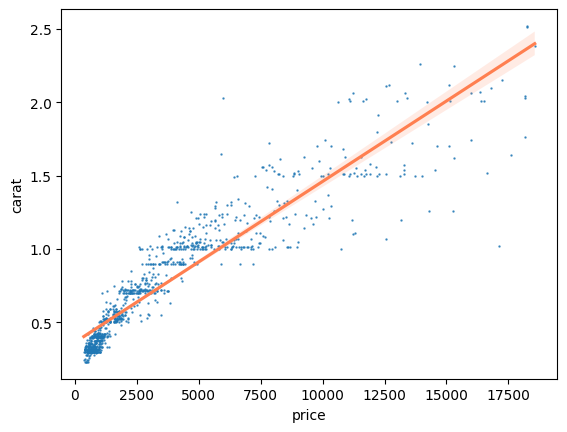

In [28]:
sns.regplot(
    x="price",
    y="carat",
    data=sampled_df,
    scatter_kws={"s": 0.5},
    line_kws={"color": "coral"}
)

### regplot 여러개 그리기
matplotlib의 subplot과 함께 사용하면 regplot을 여러개 그릴 수 있습니다.

<AxesSubplot: xlabel='price', ylabel='z'>

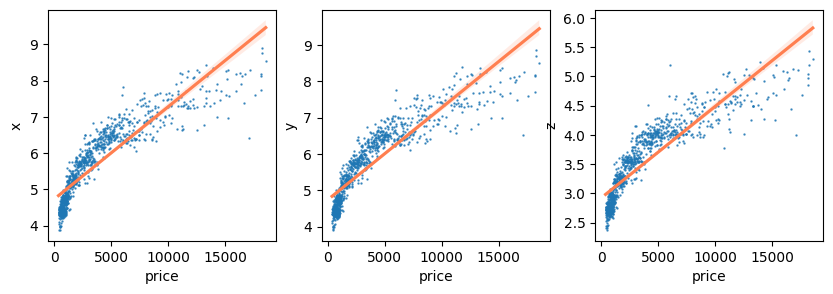

In [41]:
fig = plt.figure(figsize=(10, 3))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.regplot(
    x="price",
    y="x",
    data=sampled_df,
    scatter_kws={"s": 0.5},
    line_kws={"color": "coral"},
    ax=ax1
)
sns.regplot(
    x="price",
    y="y",
    data=sampled_df,
    scatter_kws={"s": 0.5},
    line_kws={"color": "coral"},
    ax=ax2
)
sns.regplot(
    x="price",
    y="z",
    data=sampled_df,
    scatter_kws={"s": 0.5},
    line_kws={"color": "coral"},
    ax=ax3
)

## 범주별로 나누어 데이터 시각화
seaborn은 사용하면 각 카테고리별로 데이터를 나눠서 시각화 하는 편리한 기능들을 제공해줍니다.

### stripplot, swarmplot
scatter plot은 연속형 변수끼리 상관관계를 그려볼 때 사용했습니다. 범주형 변수와 연속형 변수의 상관관계를 알아보기 위해서도 산포도를 이용할 수 있으며, 이 때 seaborn에서 지원하는 stripplot과 swarm plot을 유용하게 사용할 수 있습니다.

In [88]:
sns.set_style("whitegrid")

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_73181/4192256434.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<AxesSubplot: xlabel='clarity', ylabel='price'>

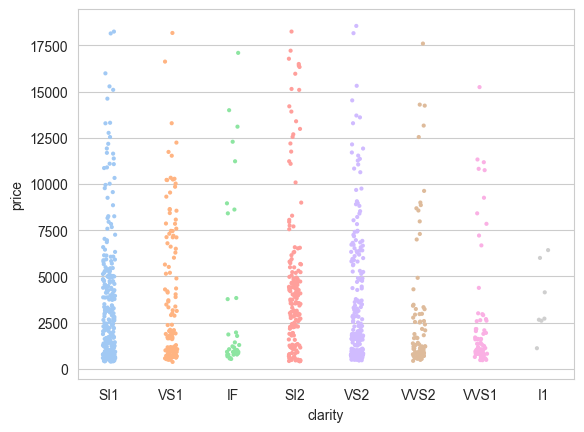

In [91]:
sns.stripplot(
    x="clarity",
    y="price",
    data=sampled_df,
    palette="pastel",
    size=3
)

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_73181/2652040999.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; 

<AxesSubplot: xlabel='clarity', ylabel='price'>

/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/miniconda3/lib/python3.10/site-packages/seaborn/categoric

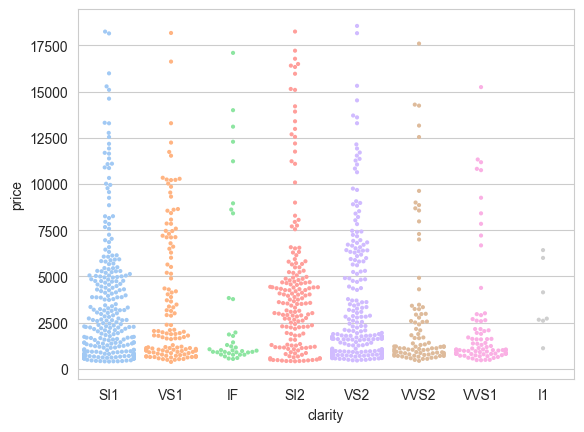

In [92]:
sns.swarmplot(
    x="clarity",
    y="price",
    data=sampled_df,
    palette="pastel",
    size=3
)

### countplot
각 범주에 속하는 데이터의 개수를 barchart로 표현합니다.

<AxesSubplot: xlabel='clarity', ylabel='count'>

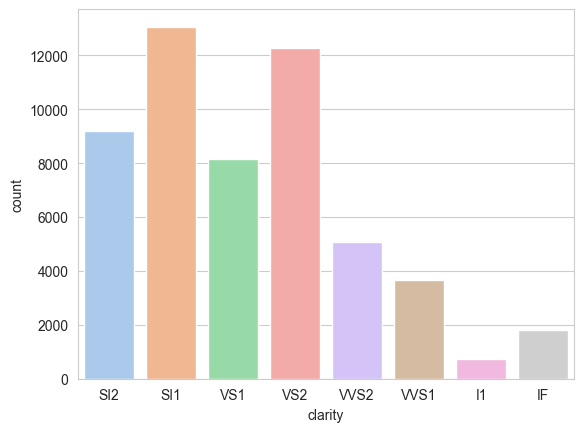

In [98]:
sns.countplot(
    x="clarity", 
    palette="pastel",
    data=df
)

hue 옵션을 추가하면 특정 카테고리 안에서 다시 세부 범주를 나눌 수 있습니다.

<AxesSubplot: xlabel='clarity', ylabel='count'>

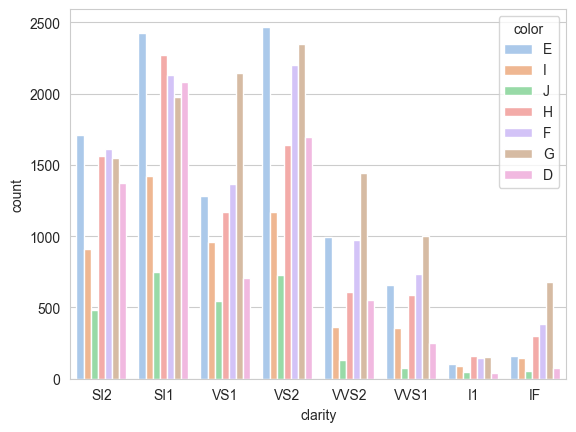

In [99]:
sns.countplot(
    x="clarity", 
    palette="pastel",
    hue="color",
    data=df
)

hue와 dodge 옵션을 같이 주면 stacked bar graph를 손쉽게 그릴 수 있습니다.

<AxesSubplot: xlabel='clarity', ylabel='count'>

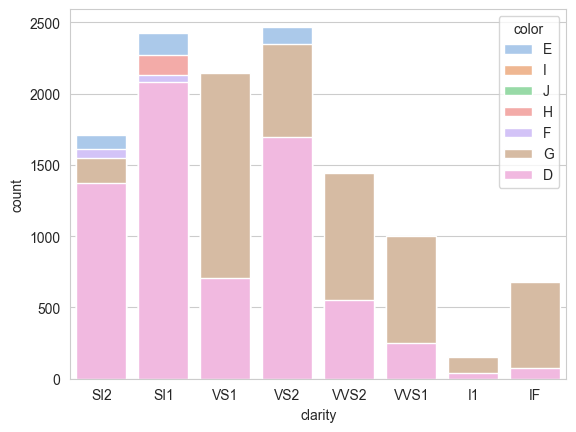

In [101]:
sns.countplot(
    x="clarity", 
    palette="pastel",
    hue="color",
    data=df,
    dodge=False
)

## Heatmap
히트맵(heatmap)은 데이터의 값에 따라 색상을 사용하여 행과 열의 관계를 시각화하는 방법입니다. 히트맵은 행렬 형태의 데이터를 가시적으로 표현하며, 각 셀에 대응하는 값에 따라 색상이 지정됩니다. 주로 2차원 데이터를 표현하기 위해 사용되며, 데이터의 패턴, 상관 관계, 변화 등을 시각적으로 파악하는 데 유용합니다.

### 빈도수 시각화
두 변수를 설정하고, 각 조합별로 몇개의 자료가 등장하는 지를 히트맵을 이용하여 쉽게 시각화 할 수 있습니다.

In [64]:
table = df.pivot_table(index=["clarity"], columns=["color"], aggfunc="size")

In [66]:
table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


<AxesSubplot: xlabel='color', ylabel='clarity'>

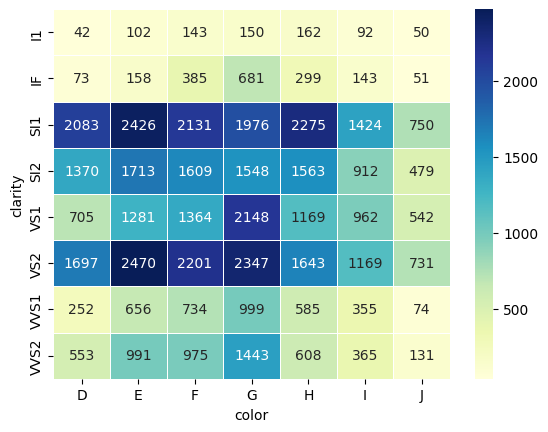

In [80]:
sns.heatmap(
    table,
    annot=True,
    fmt="d",
    linewidth=0.5,
    cmap="YlGnBu"
)

In [70]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### correlation 시각화
pandas dataframe의 corr 함수와 함께 사용하면 변수들 간의 선형 상관관계를 쉽게 시각화할 수 있습니다.

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_73181/3537979737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<AxesSubplot: >

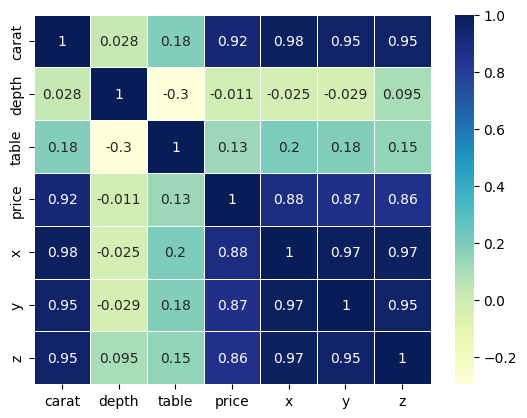

In [79]:
sns.heatmap(
    df.corr(),
    annot=True,
    linewidth=0.5,
    cmap="YlGnBu"
)

## 확률 분포 시각화
### displot
연속 확률 변수의 데이터 분포를 확인할 때 사용하는 plot입니다. 기본적으로 히스토그램과 확률 밀도 함수를 그래프로 출력해줍니다.

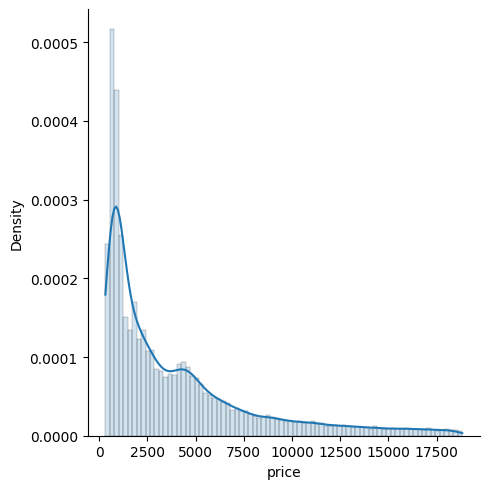

In [57]:
sns.displot(
    df["price"], 
    kde=True, 
    stat="density",
    alpha=0.2, 
    edgecolor=(0, 0, 0, 0.4),
)

### histplot, kdeplot
만일 histogram만 그리고 싶거나 확률 밀도 함수만 그리고 싶으면 각각 histplot과 kdeplot을 이용하면 됩니다. 

<AxesSubplot: xlabel='price', ylabel='Count'>

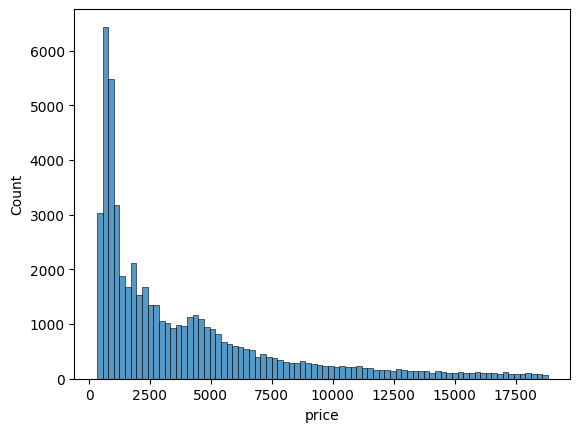

In [58]:
sns.histplot(
    df["price"]
)

<AxesSubplot: xlabel='price', ylabel='Density'>

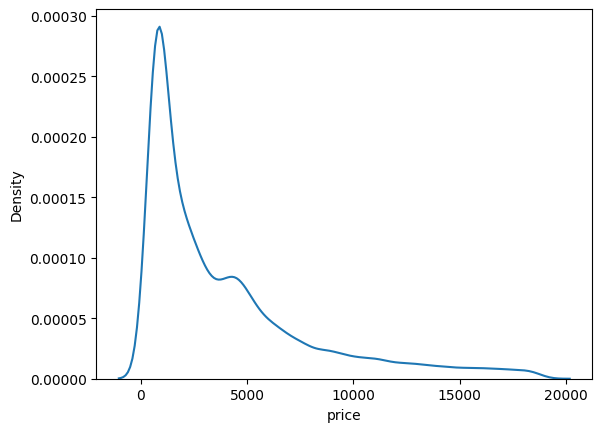

In [60]:
sns.kdeplot(
    df["price"]
)

### violin plot

boxplot과 유사하지만, 거기에 확률 밀도 함수를 추가하여 데이터의 분포를 파악하기 쉬운 플랏입니다. x축에는 범주형 확률 변수, y축에는 연속형 확률 변수를 넣어주면 됩니다.

<AxesSubplot: title={'center': 'price per clarity'}, xlabel='clarity', ylabel='price'>

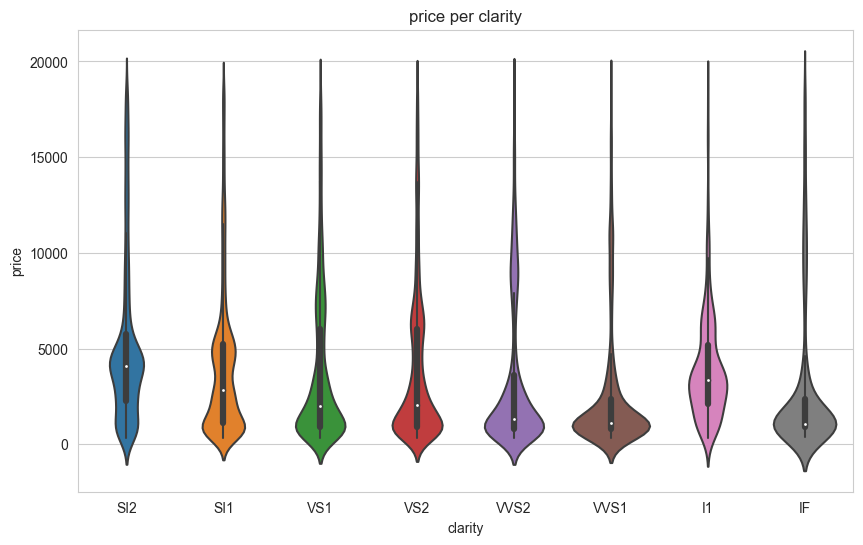

In [111]:
plt.figure(figsize=(10, 6))
plt.title("price per clarity")
sns.violinplot(
    x="clarity",
    y="price",
    data=df,
)

마찬가지로 hue 옵션을 넣으면 범주 안에서 한번 더 구분을 할 수 있습니다.

<AxesSubplot: title={'center': 'price per clarity'}, xlabel='clarity', ylabel='price'>

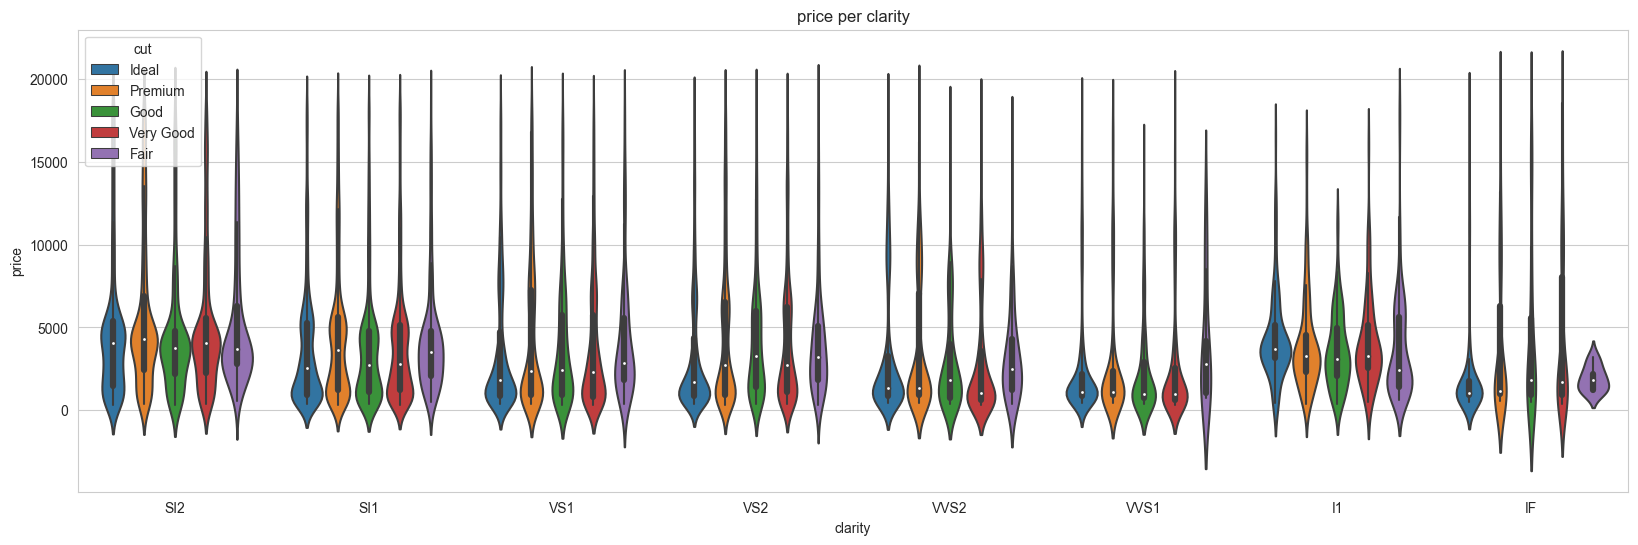

In [116]:
plt.figure(figsize=(20, 6))
plt.title("price per clarity")
sns.violinplot(
    x="clarity",
    y="price",
    hue="cut",
    data=df,
)

## 정리
이번 챕터에서는 seaborn을 이용한 데이터 시각화를 알아보았습니다. 특히 회귀선을 함께 시각화 하거나, 확률 밀도 함수를 함께 시각화 하는 등 통계학 요소들을 함께 시각화 해주는 기능들을 알아보았습니다. 이어지는 챕터들에서는 이렇게 시각화한 데이터를 기반으로 통계 분석을 진행해보겠습니다.